<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

### **Задание 0**
Для чего фиксируем сиды в домашках?

> Для воспроизводимости результатов





# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [3]:
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
3  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   
4  Individual       Manual   First Owner  20.14 kmpl  1197 CC   81.86 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2  22.4 kgm at 1750-2750rpm    5.0  
3     11.5@ 4,500(kgm@ rpm)    5.0  
4         113.75nm@ 4000rpm    5.0

In [4]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [5]:
df_train.isna().any() # Вывод колонок с Nan

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage           True
engine            True
max_power         True
torque            True
seats             True
dtype: bool

In [6]:
df_train.duplicated().any() # Есть дубликаты

True

In [7]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

profile = ProfileReport(df_train, title="Profiling Report")

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 41.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=a59b44674e2233735297736c3c685c5e44844f8e293f39303f090b07f3f03709
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [8]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Данный датасет имеет 5 текстовых признака, из которых 4 на самом деле не являются текстовыми. Этими признаками являются milage, engine, max_power и torque. Поэтому про них сейчас ничего, кроме того, что их надо будет обработать, сказать нечего.

Также в датасете есть 4 категориальных признака: fuel - тип топлива, используемый машиной, seller_type - продавец автомобиля, transmission - тип коробки передач, owner - сколько владельцев было у автомобиля.

Большинство машин является дизельными - 54.2%, далее идут бензиновые - 44.6%, самыми редкими идут машины на натуральном и сжижженом газе - 0.7% и 0.5% соответственно. Также 83.2% продавцов - это физические лица, дилерский центр - 13.8%, доверенный дилерский центр -  2.9%. Автоматическая коробка передач стоит всего на 12.9% автомобилей, остальные 87.1% - механические коробки передач. Распределение по количеству бывших владельцев автомобиля такое: один владелец - 65.5%; два - 25.6%; три - 6.8%; четыре и более - 2.1%; ни одного (тест драйв машина) - 0.1%.

Осталось разобрать 4 номинальных признака: year - год выпуска, selling_price - отпускная цена, km_driven - пробег в километрах, seats - количество сидений.

Квантили года выпуска такие: min - 1983, 5 процентиль - 2006, 25 процентиль - 2011, медиана - 2015, 75 процентиль - 2017, 95 процентиль - 2019, max - 2020. Средний год выпуска - 2013.8, стандартное отклонение - 4.05.

Квантили отпускной цены такие: min - 29999, 5 процентиль - 110000, 25 процентиль - 254999, медиана - 450000, 75 процентиль - 675000, 95 процентиль - 1925000, max - 10000000. Средняя отпускная цена - 639515.2, стандартное отклонение - 808941.91. Распределение похоже на логнормальное распределение.

Квантили пробега такие: min - 1, 5 процентиль - 9000, 25 процентиль - 35000, медиана - 60000, 75 процентиль - 97000, 95 процентиль - 150000, max - 2360457. Средний пробег - 69584.6, стандартное отклонение - 57724.

Квантили количества сидений такие: min - 2, 5 процентиль - 5, 25 процентиль - 5, медиана - 5, 75 процентиль - 5, 95 процентиль - 7, max - 14. Среднее количество сидений - 5.42, стандартное отклонение - 0.966.



### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

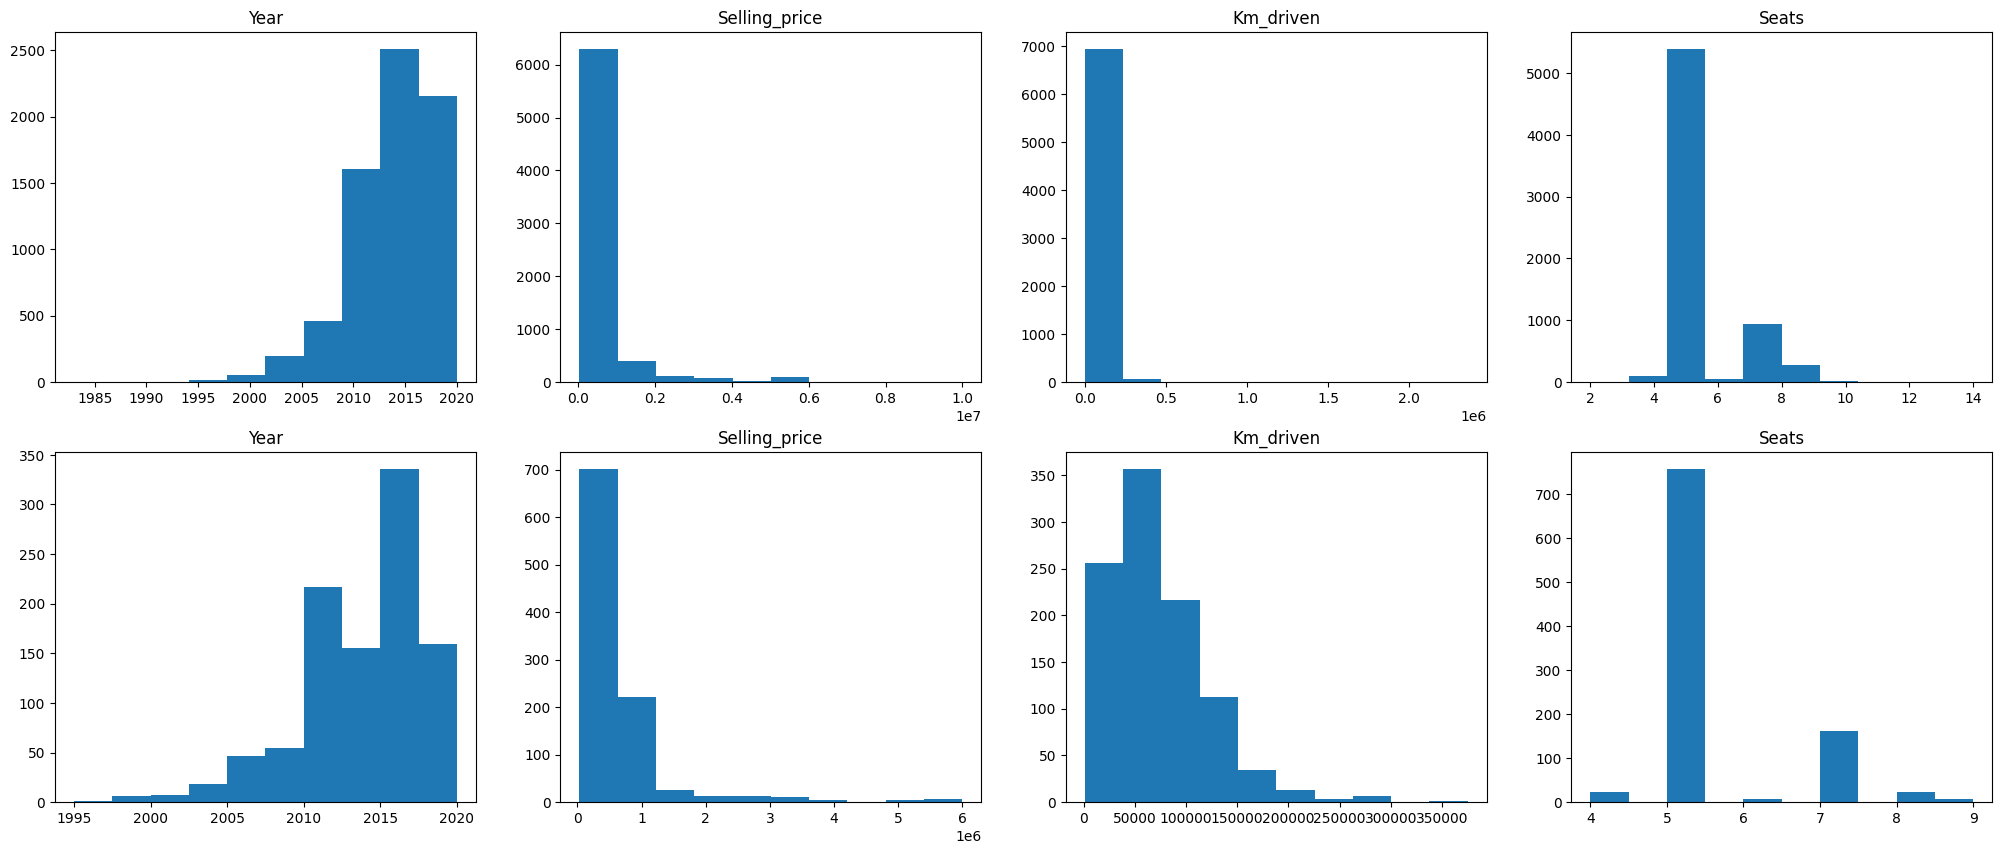

In [9]:
import matplotlib.pyplot as plt
fig, axis = plt.subplots(nrows = 2, ncols=4, figsize = (25, 10))
i = 0
for col in df_train: # Plots for train
    if df_train[col].dtype == 'O':
      continue
    else:
      axis[0][i].hist(df_train[col])
      axis[0][i].set_title(col.capitalize())
      i += 1
i = 0
for col in df_test: # Plots for test
    if df_test[col].dtype == 'O':
      continue
    else:
      axis[1][i].hist(df_test[col])
      axis[1][i].set_title(col.capitalize())
      i += 1

Числовые признаки распределены примерно одинаково в трейне и тесте. Посмотрим теперь на средние и медиану:

In [10]:
df_train.describe(percentiles = [0.5])

year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [11]:
df_test.describe(percentiles = [0.5])

year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000

Средние и медиана тоже примерно одинаковы в трейне и тесте. Теперь посмотрим на категориальные признаки:

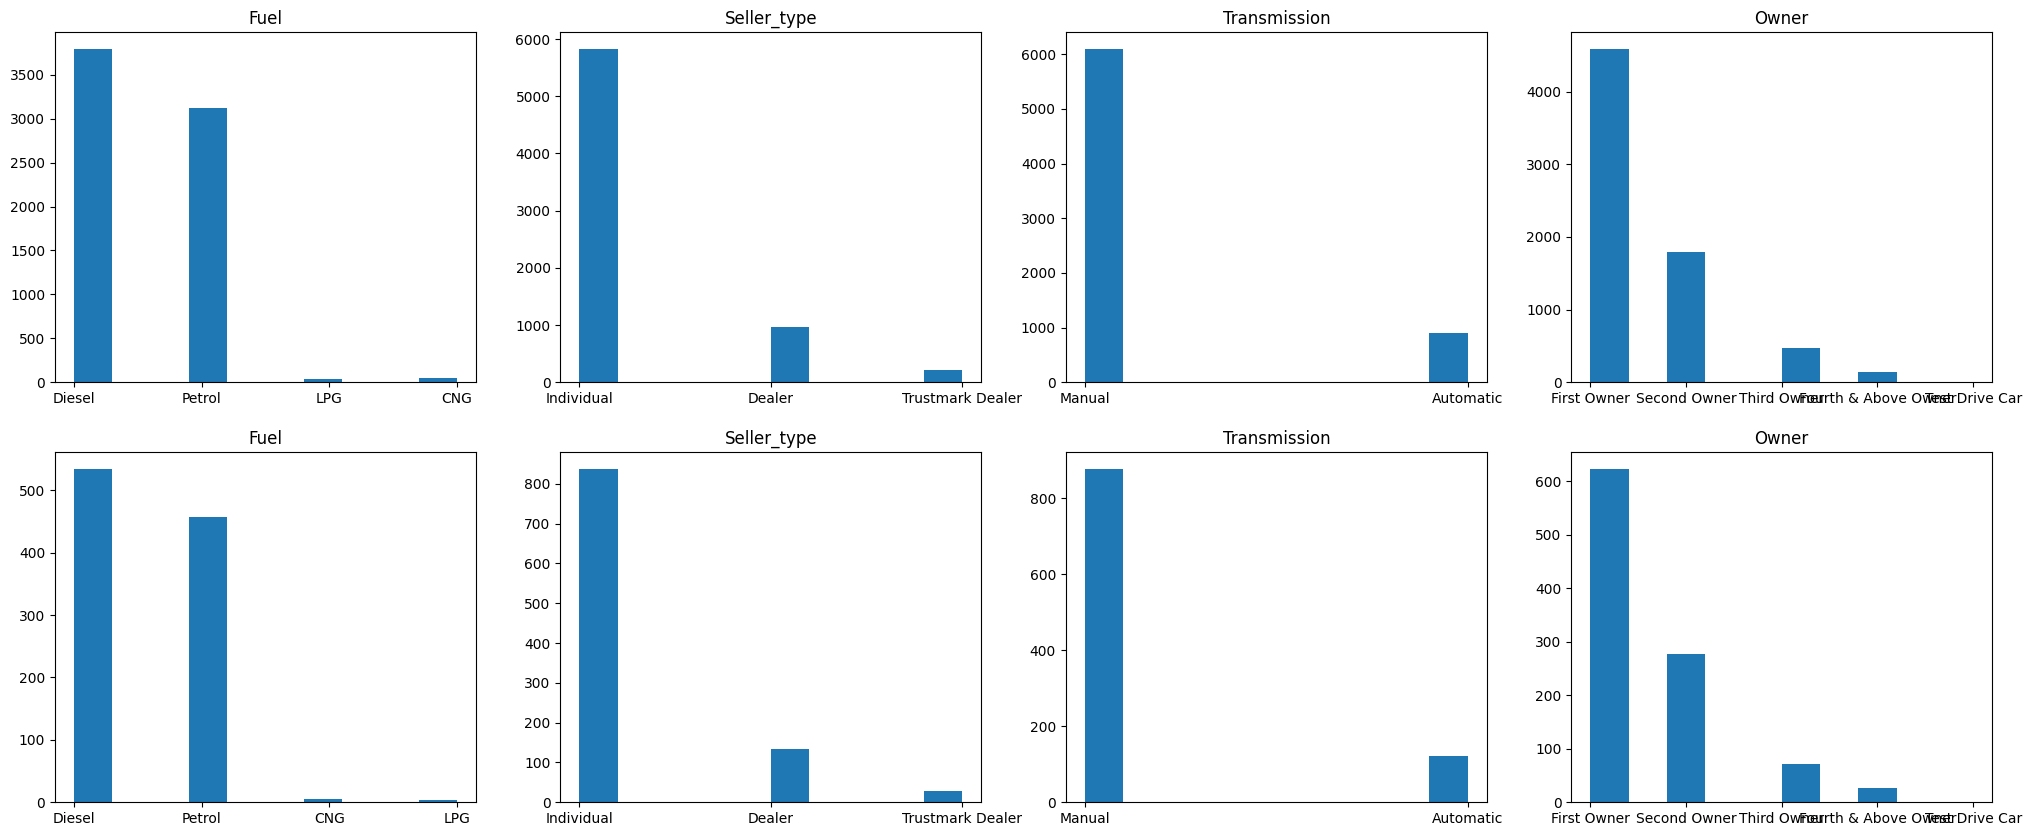

In [12]:
fig, axis = plt.subplots(nrows = 2, ncols=4, figsize = (25, 10))
cols = ['fuel', 'seller_type', 'transmission', 'owner']
i = 0
for col in cols: # Plots for train
    axis[0][i].hist(df_train[col])
    axis[0][i].set_title(col.capitalize())
    i += 1
i = 0
for col in cols: # Plots for test
    axis[1][i].hist(df_test[col])
    axis[1][i].set_title(col.capitalize())
    i += 1

Категориальные признаки тоже распределены примерно похожим образом. Эти результаты могут говорить, что трейн и тест стратифицированы достаточно хорошо, то есть у нас нет перекоса в данных в сторону тест или трейна ни по одной из вышеперечисленных переменных.

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [ ] Отобразите такие объекты (0.05 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [13]:
print(df_train.drop(columns = ['selling_price']).duplicated().any()) # Check if there are eny duplicates
print(df_train.shape) # Shape of initial df_train
duplicates = df_train[df_train.drop(columns = ['selling_price']).duplicated()]
print(duplicates.shape) # Shape of duplicated rows (1159 duplicates)

True
(6999, 13)
(1159, 13)


In [14]:
duplicates.sort_values(by = 'name').head(10) # Example of duplicates

name  year  selling_price  km_driven  \
6307  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
6704               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
6640            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
1595            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
2787            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
1337            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
4485            Audi Q5 35TDI Premium Plus  2018        3975000      31800   
1784         BMW 3 Series 320d Luxury Line  2012        1300000     140000   
4050    BMW 3 Series 320d Luxury Line Plus  2017        2600000      44000   
1787         BMW 3 Series 320d Luxury Plus  2013        1300000     140000   

        fuel seller_type transmission         owner     mileage   engine  \
6307  Diesel      Dealer    Automatic   First Owner  15.73 kmpl  1968 CC   
6704  Diesel  Individual    Automatic   First Owner  13.22 kmpl  2967 CC   
6640  Diesel      Dealer    Automatic   First Owner  17.01 kmpl  1968 CC   
1595  Diesel      Dealer    Automatic   First Owner  17.01 kmpl  1968 CC   
2787  Diesel      Dealer    Automatic   First Owner  17.01 kmpl  1968 CC   
1337  Diesel      Dealer    Automatic   First Owner  17.01 kmpl  1968 CC   
4485  Diesel      Dealer    Automatic   First Owner  17.01 kmpl  1968 CC   
1784  Diesel  Individual    Automatic  Second Owner  18.88 kmpl  1995 CC   
4050  Diesel      Dealer    Automatic   First Owner  22.69 kmpl  1995 CC   
1787  Diesel  Individual    Automatic  Second Owner  18.88 kmpl  1995 CC   

       max_power               torque  seats  
6307  174.33 bhp  380Nm@ 1750-2500rpm    5.0  
6704   241.4 bhp  580Nm@ 1400-3250rpm    5.0  
6640     188 bhp  400nm@ 1750-3000rpm    5.0  
1595     188 bhp  400nm@ 1750-3000rpm    5.0  
2787     188 bhp  400nm@ 1750-3000rpm    5.0  
1337     188 bhp  400nm@ 1750-3000rpm    5.0  
4485     188 bhp  400nm@ 1750-3000rpm    5.0  
1784     184 bhp  380Nm@ 1750-2750rpm    5.0  
4050     190 bhp  400Nm@ 1750-2750rpm    5.0  
1787     184 bhp  380Nm@ 1750-2750rpm    5.0

In [15]:
df_train.drop(index = duplicates.index, inplace = True)

In [16]:
assert df_train.shape == (5840, 13)

In [17]:
df_train.reset_index(inplace = True, drop = True)
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner     mileage  \
0     Diesel  Individual       Manual           First Owner   23.4 kmpl   
1     Diesel  Individual       Manual          Second Owner  21.14 kmpl   
2     Diesel  Individual       Manual           First Owner   23.0 kmpl   
3     Petrol  Individual       Manual           First Owner   16.1 kmpl   
4     Petrol  Individual       Manual           First Owner  20.14 kmpl   
...      ...         ...          ...                   ...         ...   
5835  Petrol  Individual       Manual           First Owner  17.92 kmpl   
5836  Petrol  Individual       Manual          Second Owner   18.9 kmpl   
5837  Petrol  Individual       Manual           First Owner   18.5 kmpl   
5838  Diesel  Individual       Manual  Fourth & Above Owner   16.8 kmpl   
5839  Diesel  Individual       Manual           First Owner   19.3 kmpl   

       engine   max_power                     torque  seats  
0     1248 CC      74 bhp             190Nm@ 2000rpm    5.0  
1     1498 CC  103.52 bhp        250Nm@ 1500-2500rpm    5.0  
2     1396 CC      90 bhp   22.4 kgm at 1750-2750rpm    5.0  
3     1298 CC    88.2 bhp      11.5@ 4,500(kgm@ rpm)    5.0  
4     1197 CC   81.86 bhp          113.75nm@ 4000rpm    5.0  
...       ...         ...                        ...    ...  
5835  1086 CC    62.1 bhp            96.1Nm@ 3000rpm    5.0  
5836   998 CC    67.1 bhp              90Nm@ 3500rpm    5.0  
5837  1197 CC   82.85 bhp           113.7Nm@ 4000rpm    5.0  
5838  1493 CC     110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
5839  1248 CC    73.9 bhp             190Nm@ 2000rpm    5.0  

[5840 rows x 13 columns]

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [18]:
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
3  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   
4  Individual       Manual   First Owner  20.14 kmpl  1197 CC   81.86 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2  22.4 kgm at 1750-2750rpm    5.0  
3     11.5@ 4,500(kgm@ rpm)    5.0  
4         113.75nm@ 4000rpm    5.0

In [19]:
df_train['engine'].unique()

array(['1248 CC', '1498 CC', '1396 CC', '1298 CC', '1197 CC', '1061 CC',
       '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC', nan,
       '1198 CC', '998 CC', '1591 CC', '2179 CC', '1368 CC', '1497 CC',
       '2982 CC', '2494 CC', '2143 CC', '2477 CC', '2755 CC', '1968 CC',
       '1196 CC', '1373 CC', '1598 CC', '1998 CC', '1086 CC', '1194 CC',
       '1798 CC', '1405 CC', '1582 CC', '999 CC', '2487 CC', '1999 CC',
       '2987 CC', '1995 CC', '1451 CC', '1969 CC', '2967 CC', '2497 CC',
       '1797 CC', '1991 CC', '2362 CC', '1493 CC', '1341 CC', '1199 CC',
       '1794 CC', '1193 CC', '2696 CC', '799 CC', '1495 CC', '1186 CC',
       '1047 CC', '2498 CC', '2523 CC', '1120 CC', '624 CC', '1496 CC',
       '1984 CC', '2354 CC', '793 CC', '1799 CC', '936 CC', '1956 CC',
       '814 CC', '1997 CC', '1948 CC', '2997 CC', '1172 CC', '2489 CC',
       '2499 CC', '2609 CC', '2953 CC', '1150 CC', '1994 CC', '1388 CC',
       '1462 CC', '2956 CC', '1527 CC', '2199 CC', '995 CC', '1599

In [20]:
df_train['mileage'].unique()

array(['23.4 kmpl', '21.14 kmpl', '23.0 kmpl', '16.1 kmpl', '20.14 kmpl',
       '17.3 km/kg', '23.59 kmpl', '20.0 kmpl', '19.01 kmpl', '17.3 kmpl',
       '19.3 kmpl', nan, '18.9 kmpl', '18.15 kmpl', '19.7 kmpl',
       '22.54 kmpl', '21.0 kmpl', '25.5 kmpl', '26.59 kmpl', '21.5 kmpl',
       '21.4 kmpl', '24.7 kmpl', '18.2 kmpl', '16.8 kmpl', '24.3 kmpl',
       '14.0 kmpl', '33.44 km/kg', '23.95 kmpl', '17.0 kmpl',
       '20.63 kmpl', '13.93 kmpl', '16.0 kmpl', '17.8 kmpl', '12.55 kmpl',
       '12.99 kmpl', '14.8 kmpl', '13.5 kmpl', '26.0 kmpl', '27.3 kmpl',
       '11.36 kmpl', '17.68 kmpl', '18.53 kmpl', '14.84 kmpl',
       '21.12 kmpl', '20.36 kmpl', '21.27 kmpl', '18.16 kmpl',
       '22.0 kmpl', '25.1 kmpl', '20.51 kmpl', '21.66 kmpl', '25.2 kmpl',
       '22.9 kmpl', '16.02 kmpl', '20.54 kmpl', '22.77 kmpl',
       '15.71 kmpl', '23.1 kmpl', '19.02 kmpl', '19.81 kmpl',
       '26.2 km/kg', '16.47 kmpl', '15.04 kmpl', '18.5 kmpl', '19.1 kmpl',
       '21.79 kmpl', '18.8 kmpl

In [21]:
df_train['max_power'].unique()

array(['74 bhp', '103.52 bhp', '90 bhp', '88.2 bhp', '81.86 bhp',
       '57.5 bhp', '37 bhp', '67.1 bhp', '68.1 bhp', '108.45 bhp',
       '60 bhp', '73.9 bhp', nan, '67 bhp', '82 bhp', '46.3 bhp',
       '88.73 bhp', '64.1 bhp', '98.6 bhp', '88.8 bhp', '83.1 bhp',
       '47.3 bhp', '73.8 bhp', '34.2 bhp', '88.5 bhp', '35 bhp',
       '40.3 bhp', '121.3 bhp', '138.03 bhp', '160.77 bhp', '117.3 bhp',
       '116.3 bhp', '67.05 bhp', '168.5 bhp', '100 bhp', '120.7 bhp',
       '98.63 bhp', '175.56 bhp', '171.5 bhp', '100.6 bhp', '174.33 bhp',
       '187.74 bhp', '170 bhp', '78.9 bhp', '88.76 bhp', '86.8 bhp',
       '108.495 bhp', '108.62 bhp', '93.7 bhp', '103.6 bhp', '98.59 bhp',
       '189 bhp', '67.04 bhp', '68.05 bhp', '58.2 bhp', '82.85 bhp',
       '81.80 bhp', '120 bhp', '94.68 bhp', '160 bhp', '155 bhp',
       '69.01 bhp', '126.32 bhp', '138.1 bhp', '83.14 bhp', '83.8 bhp',
       '126.2 bhp', '62.1 bhp', '86.7 bhp', '188 bhp', '214.56 bhp',
       '177 bhp', '148.31 bhp', 

Для engine, max_power и mileage можем просто убирать единицу измерения, т.к. у engine и max_power она вообще не меняется, а у mileage это kmpl и km/kg, что почти одно и то же.

In [22]:
def trunc_max_power(value):
  if not value is np.nan and value != '0' and value != ' bhp':
    return float(value[:-4])
  elif value == '0':
    return 0.
  else:
    return np.nan

df_train['max_power'] = df_train['max_power'].apply(trunc_max_power)
df_test['max_power'] = df_test['max_power'].apply(trunc_max_power)

def trunc_mileage(value):
  if not value is np.nan and value[-2:] == 'pl':
    return float(value[:-5])
  elif not value is np.nan and value[-2:] == 'kg':
    return float(value[:-6])
  elif value == '0':
    return 0.
  else:
    return np.nan

df_train['mileage'] = df_train['mileage'].apply(trunc_mileage)
df_test['mileage'] = df_test['mileage'].apply(trunc_mileage)

def trunc_engine(value):
  if not value is np.nan:
    return float(value[:-3])
  else:
    return np.nan

df_train['engine'] = df_train['engine'].apply(trunc_engine)
df_test['engine'] = df_test['engine'].apply(trunc_engine)

df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power  \
0  Individual       Manual   First Owner    23.40  1248.0      74.00   
1  Individual       Manual  Second Owner    21.14  1498.0     103.52   
2  Individual       Manual   First Owner    23.00  1396.0      90.00   
3  Individual       Manual   First Owner    16.10  1298.0      88.20   
4  Individual       Manual   First Owner    20.14  1197.0      81.86   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2  22.4 kgm at 1750-2750rpm    5.0  
3     11.5@ 4,500(kgm@ rpm)    5.0  
4         113.75nm@ 4000rpm    5.0

Теперь переделаем torque:

In [23]:
df_train['torque'].unique()

array(['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm',
       '22.4 kgm at 1750-2750rpm', '11.5@ 4,500(kgm@ rpm)',
       '113.75nm@ 4000rpm', '7.8@ 4,500(kgm@ rpm)', '59Nm@ 2500rpm',
       '170Nm@ 1800-2400rpm', '160Nm@ 2000rpm', '248Nm@ 2250rpm',
       '78Nm@ 4500rpm', nan, '84Nm@ 3500rpm', '115Nm@ 3500-3600rpm',
       '62Nm@ 3000rpm', '219.7Nm@ 1500-2750rpm', '200Nm@ 1750rpm',
       '115Nm@ 4000rpm', '69Nm@ 3500rpm', '172.5Nm@ 1750rpm',
       '6.1kgm@ 3000rpm', '60Nm@ 3500rpm', '90Nm@ 3500rpm',
       '151Nm@ 4850rpm', '104Nm@ 4000rpm', '320Nm@ 1700-2700rpm',
       '250Nm@ 1750-2500rpm', '145Nm@ 4600rpm', '146Nm@ 4800rpm',
       '343Nm@ 1400-3400rpm', '200Nm@ 1400-3400rpm',
       '200Nm@ 1250-4000rpm', '400Nm@ 2000-2500rpm',
       '360Nm@ 1200-3400rpm', '200Nm@ 1200-3600rpm',
       '380Nm@ 1750-2500rpm', '400Nm@ 1750-3000rpm',
       '400Nm@ 1400-2800rpm', '200Nm@ 1750-3000rpm', '111.7Nm@ 4000rpm',
       '219.6Nm@ 1500-2750rpm', '112Nm@ 4000rpm', '250Nm@ 1500-3000rpm',
       '1

In [24]:
import re

def find_force(value):
  if value is np.nan:
    return np.nan
  value = value.lower()
  value = value.replace(',', '')
  if 'nm' in value:
    return float(re.findall('\d+', value)[0])
  elif 'kgm' in value:
    return float(re.findall('\d+', value)[0]) / 0.101972 # Converting to nm
  elif len(str(int(re.findall('\d+', value)[0]))) == 3:
    return float(re.findall('\d+', value)[0])
  elif len(str(int(re.findall('\d+', value)[0]))) == 2:
    return float(re.findall('\d+', value)[0]) / 0.101972
  else:
    print(value)
    raise ValueError # Check that all values were found correctly

def find_max_rpm(value):
  if value is np.nan:
    return np.nan
  value = value.lower()
  value = value.replace(',', '')
  if 'rpm' in value:
    return float(re.findall('\d+', value)[-1])
  elif len(re.findall('\d+', value)) > 1:
    return float(re.findall('\d+', value)[-1])
  else:
    return np.nan

df_train['max_torque_rpm'] = df_train['torque'].apply(find_max_rpm)
df_train['torque'] = df_train['torque'].apply(find_force)
df_test['max_torque_rpm'] = df_test['torque'].apply(find_max_rpm)
df_test['torque'] = df_test['torque'].apply(find_force)

In [25]:
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power  \
0  Individual       Manual   First Owner    23.40  1248.0      74.00   
1  Individual       Manual  Second Owner    21.14  1498.0     103.52   
2  Individual       Manual   First Owner    23.00  1396.0      90.00   
3  Individual       Manual   First Owner    16.10  1298.0      88.20   
4  Individual       Manual   First Owner    20.14  1197.0      81.86   

       torque  seats  max_torque_rpm  
0  190.000000    5.0          2000.0  
1  250.000000    5.0          2500.0  
2  215.745499    5.0          2750.0  
3  107.872749    5.0          4500.0  
4  113.000000    5.0          4000.0

In [26]:
df_test.head()

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner  mileage  engine  max_power  \
0  Diesel  Individual       Manual   First Owner     14.0  2498.0      112.0   
1  Diesel  Individual       Manual   First Owner     21.5  1497.0      108.5   
2  Petrol  Individual    Automatic   First Owner     12.9  1799.0      130.0   
3  Diesel  Individual       Manual   First Owner     25.1  1498.0       98.6   
4  Petrol  Individual       Manual  Second Owner     16.5  1172.0       65.0   

   torque  seats  max_torque_rpm  
0   260.0    7.0          2200.0  
1   260.0    5.0          2750.0  
2   172.0    5.0          4300.0  
3   200.0    5.0          1750.0  
4    96.0    5.0          3000.0

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






Лучше выбирать медиану, так как она устойчива к выбросам. Также, если наше распределение, из которого мы получили данную величину имеет не нормальное распределение, то скорее всего среднее будет указывать не на настоящего обычного представителя распределения, а со смещением в сторону толстого хвоста распределения.

Для теста лучше использовать медианы трейна, так как тестовые данные должны быть скрыты от нас. Мы для каждого нового тестового значения будем предсказывать целевую переменную по одному, а другие мы не знаем. Следовательно стоит заполнять значение в тесте значениями, которые мы имеем право знать, то есть те, что найдены по обучающим данным.

In [27]:
medians = df_train.median(numeric_only = True).to_dict()
df_train.fillna(medians, inplace = True)
df_test.fillna(medians, inplace = True)

In [28]:
medians

{'year': 2014.0,
 'selling_price': 405000.0,
 'km_driven': 70000.0,
 'mileage': 19.369999999999997,
 'engine': 1248.0,
 'max_power': 81.86,
 'torque': 160.0,
 'seats': 5.0,
 'max_torque_rpm': 3000.0}

In [29]:
df_train.isna().any() # Пропусков нет

name              False
year              False
selling_price     False
km_driven         False
fuel              False
seller_type       False
transmission      False
owner             False
mileage           False
engine            False
max_power         False
torque            False
seats             False
max_torque_rpm    False
dtype: bool

In [30]:
df_test.isna().any() # Пропусков нет

name              False
year              False
selling_price     False
km_driven         False
fuel              False
seller_type       False
transmission      False
owner             False
mileage           False
engine            False
max_power         False
torque            False
seats             False
max_torque_rpm    False
dtype: bool

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [31]:
df_train['engine'] = df_train['engine'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

In [32]:
df_train['engine'].dtype

dtype('int64')

Переменную seats можно рассмотреть как категориальную переменную, так как нет чёткой зависимости, между количеством сидений и ценой автомобиля, поскольку количество сидений скорее указывает на тип автомобиля. Так двуместный автомобиль может быть спортивным и быть дороже чем обычный пятиместный автомобиль, а в свою очередь автомобиль с 14 сиденьями тоже скорее всего будет стоить больше пятиместного из-за своей вместительности.

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [33]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power       torque        seats  max_torque_rpm  
count  5840.000000  5840.000000  5840.000000     5840.000000  
mean     87.906371   175.021166     5.426712     3039.967123  
std      31.640418   107.217433     0.982344      916.326648  
min       0.000000    39.226454     2.000000      500.000000  
25%      68.000000   111.000000     5.000000     2250.000000  
50%      81.860000   160.000000     5.000000     3000.000000  
75%      99.000000   200.000000     5.000000     4000.000000  
max     400.000000  1863.256580    14.000000    21800.000000

Заполнение медианами могло сдвинуть распределение только в том случае, если значения nan появлялись только у некоторой определенной группы автомобилей. Если же такого не произошло, то в среднем у каждого автомобиля со значением nan должно было быть именно медианное значение, поэтому распределение изменилось только с точки зрения уменьшения дисперсии. Медиана измениться не могла.

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

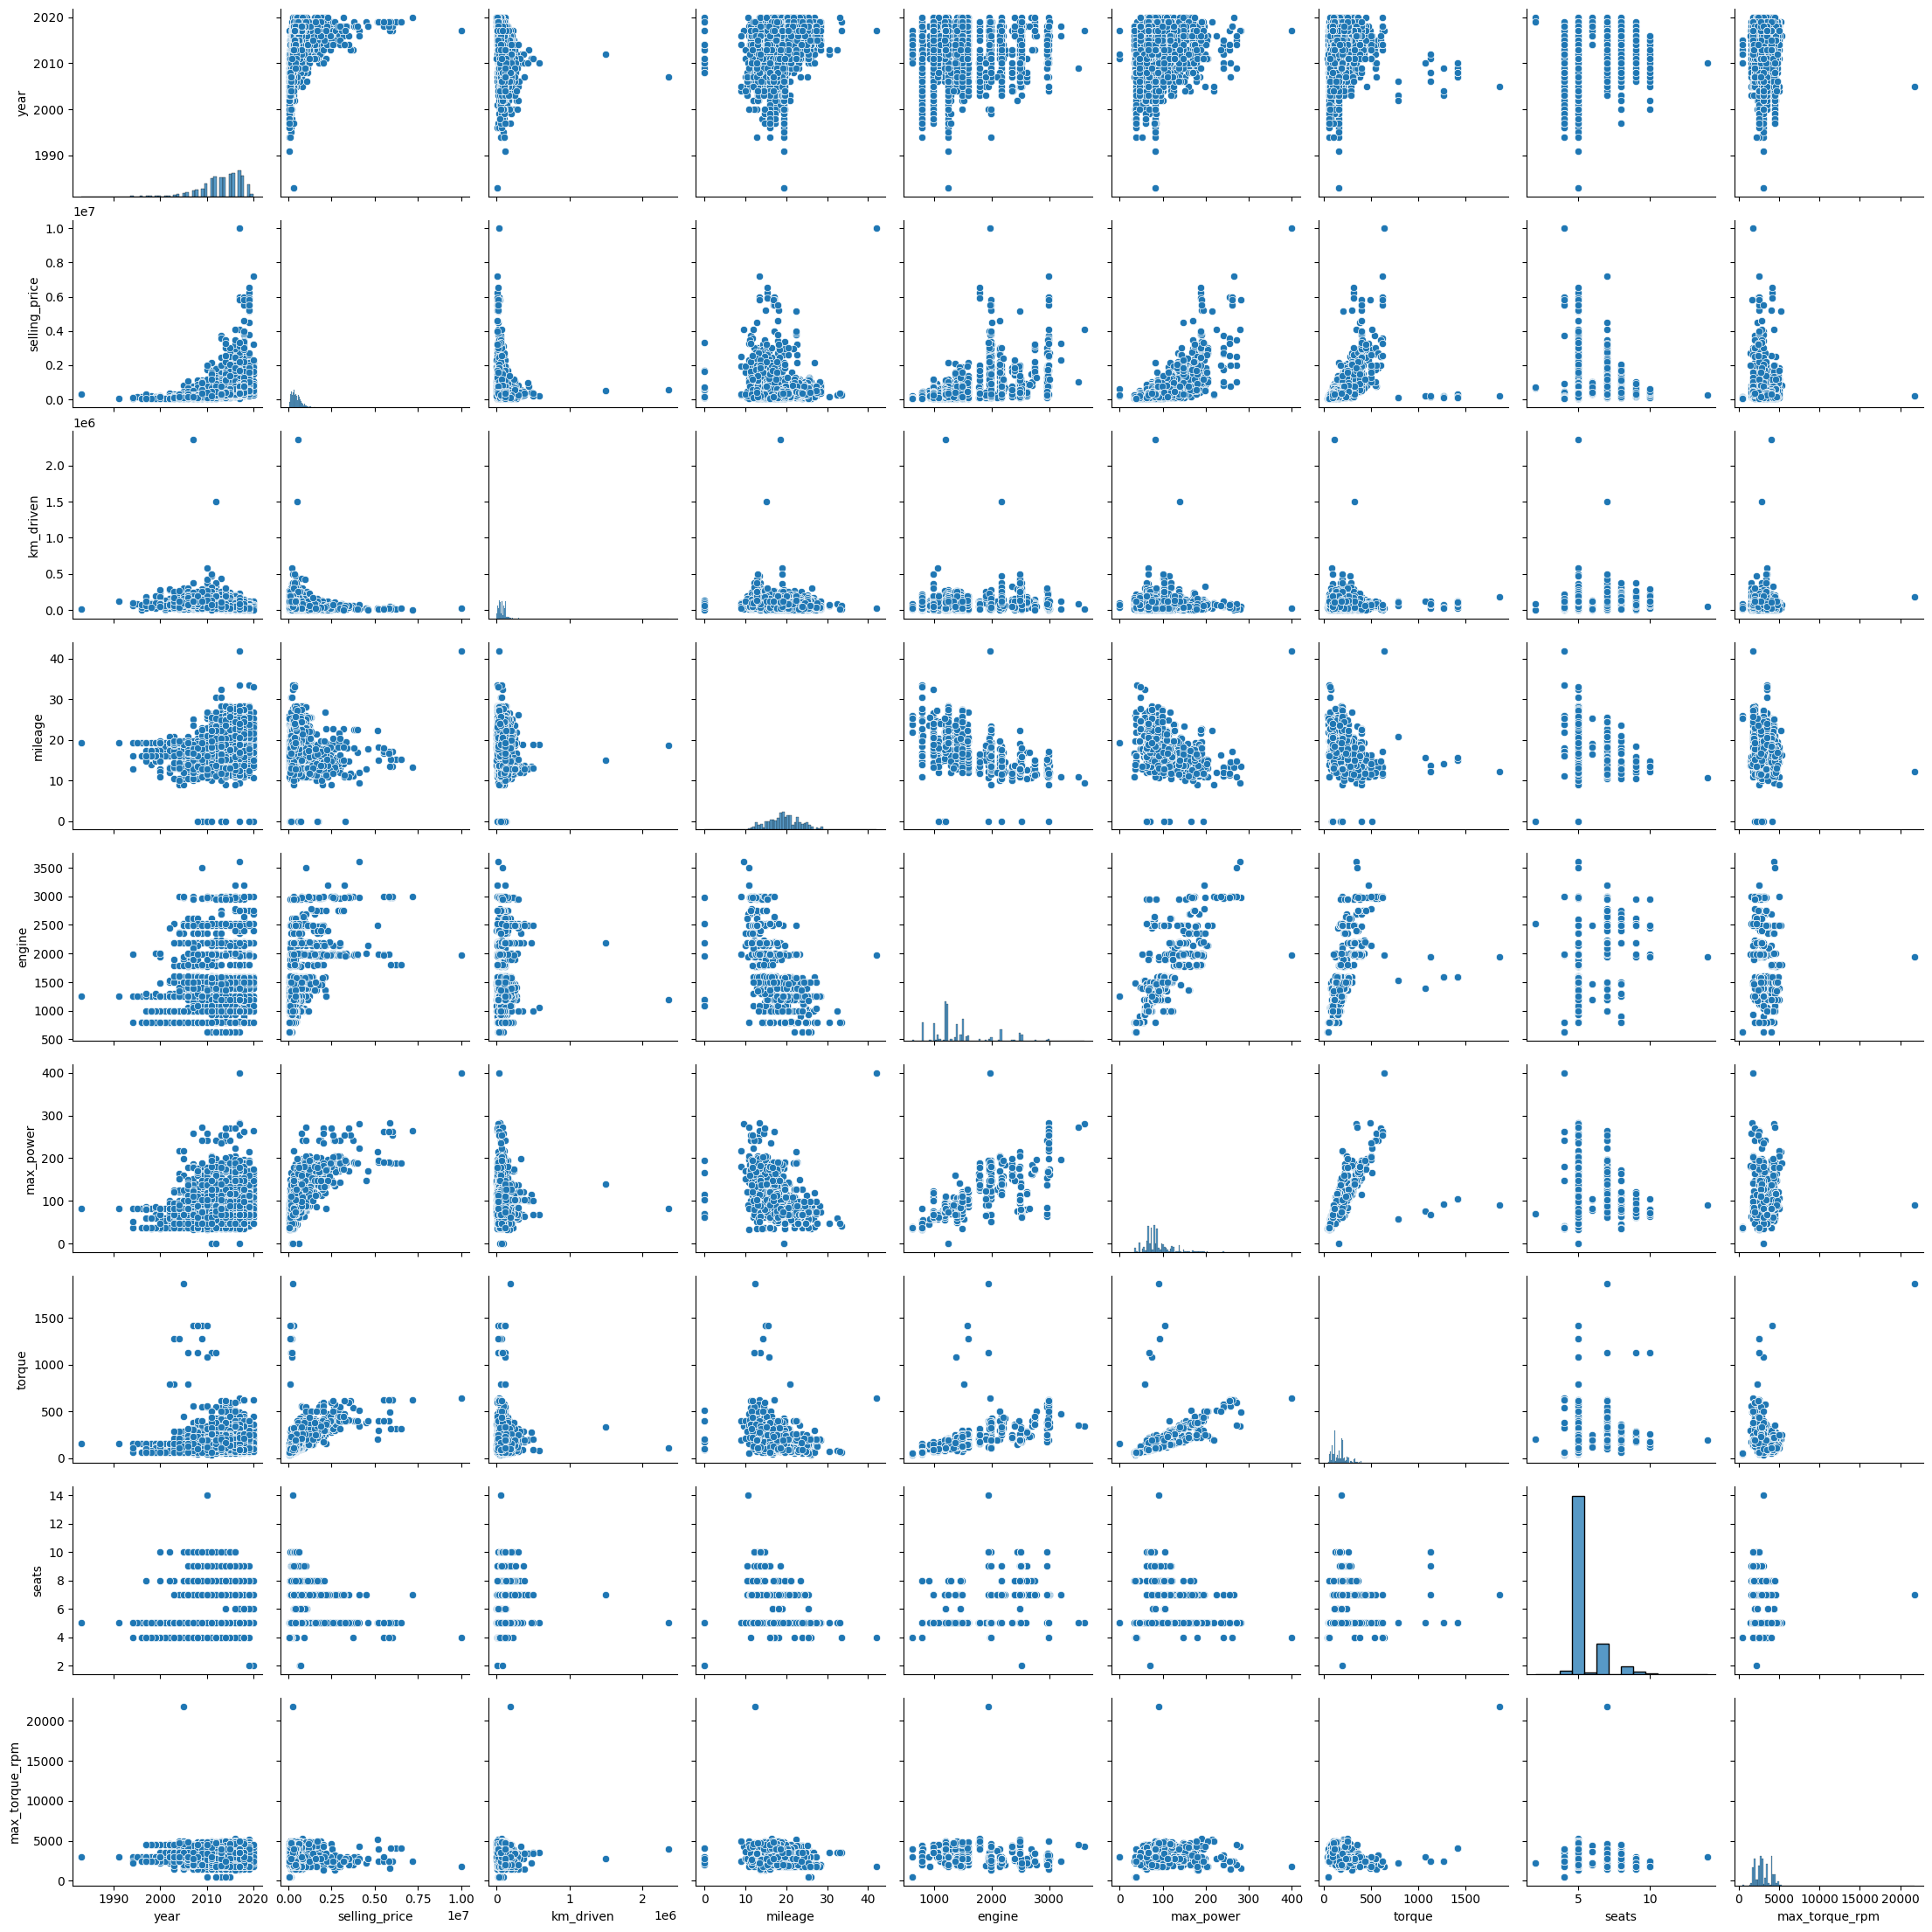

In [34]:
sns.pairplot(df_train)

С целевой переменной по графику можно увидеть неплохую зависимость по переменным year, engine, max_power и torque. Между всеми переменными можно увидеть, что некоторые из них сильно коррелируют между собой. Перечислять все пары таких переменных пока не будем, посмотрим на численные значения корреляций в следующем задании.

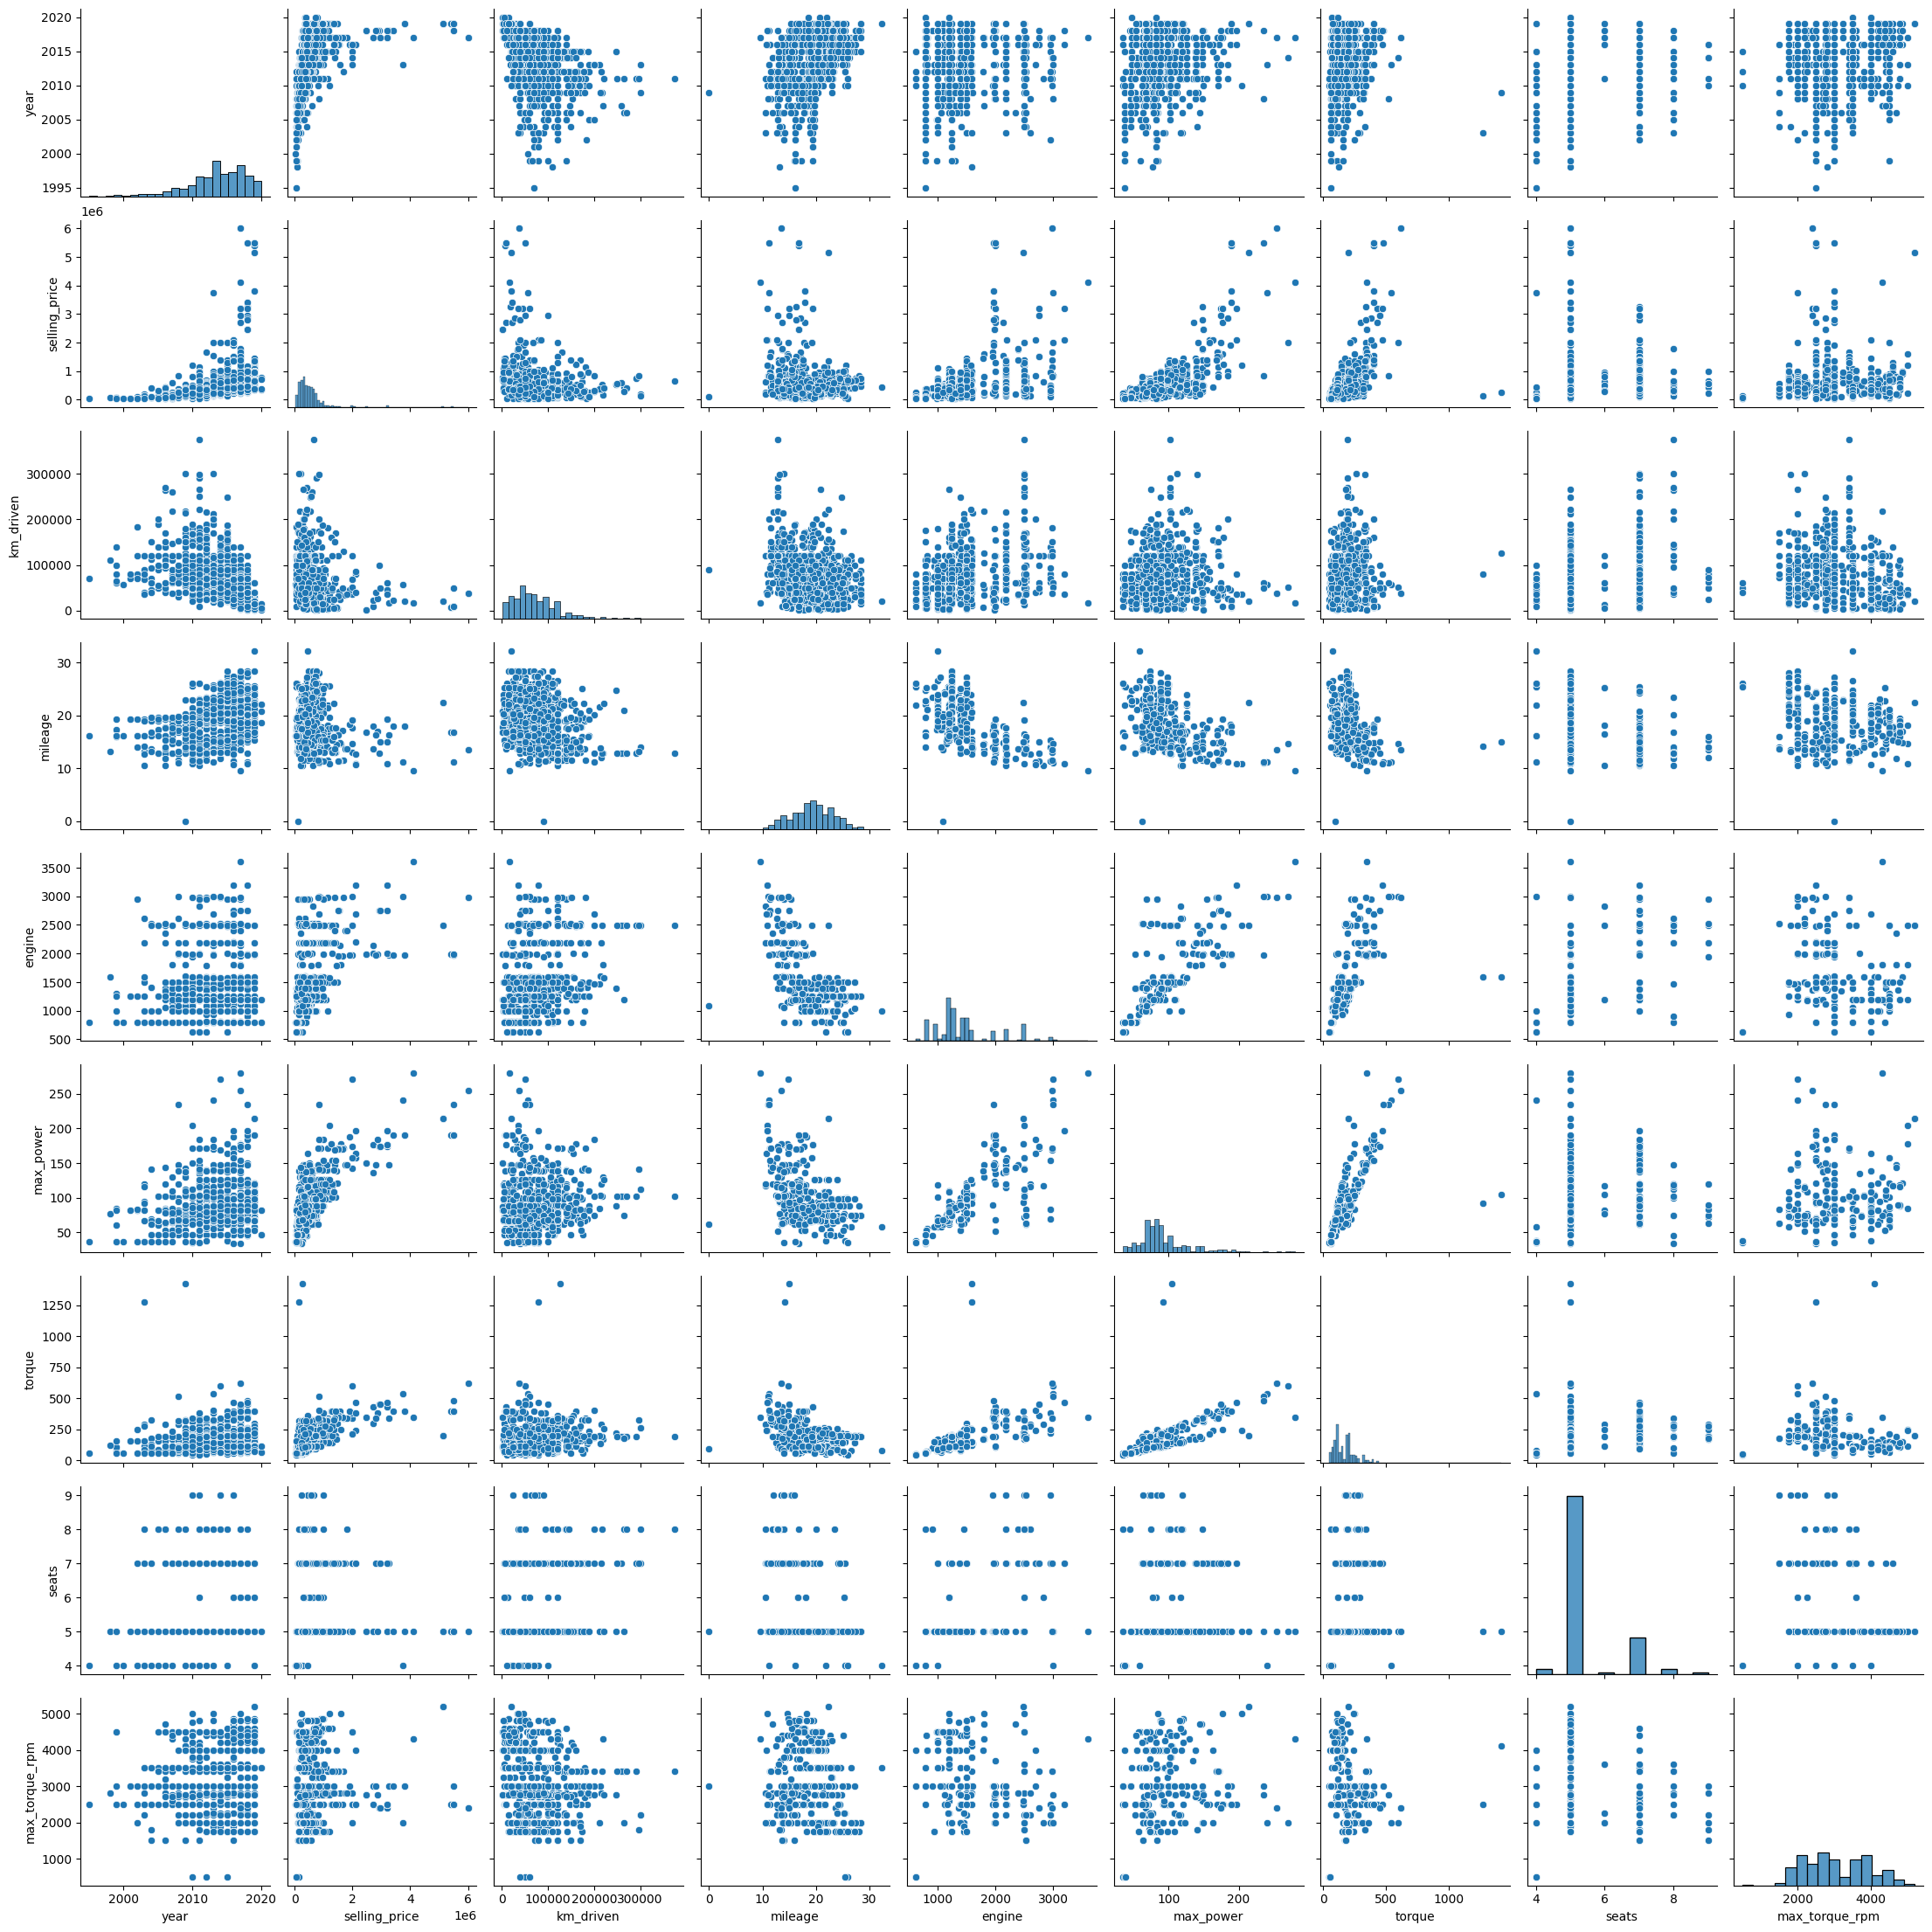

In [35]:
sns.pairplot(df_test)

В целом распределения и скаттер плоты всех переменных в трейне и тесте сильно не отличаются. Не вижу предпосылок полагать, что какие-то данные сильно смещены в тесте относительно трейна.

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

In [36]:
df_train.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'max_torque_rpm'],
      dtype='object')

<Axes: >

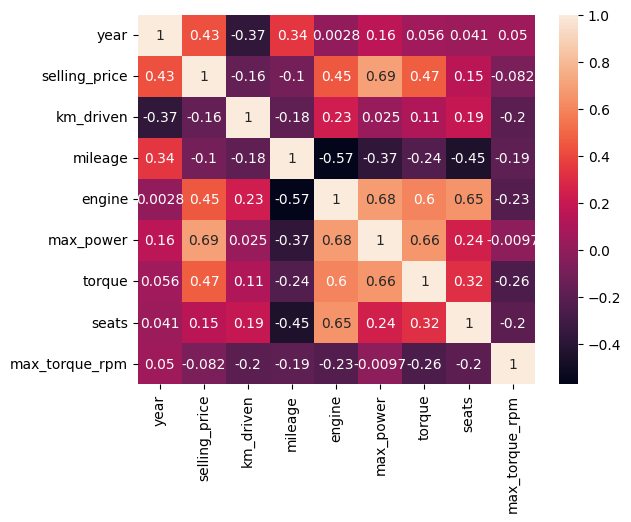

In [37]:
sns.heatmap(df_train.drop(columns = ['name', 'fuel', 'seller_type', 'transmission', 'owner']).corr(), annot = True)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

Наименее скоррелированы между собой переменные year и engine.

Сильная положительная линейная связь наблюдается между парами (engine, max_power), (max_power, torque), (selling_price, max_power), (engine, seats).

Не совсем правильно так утверждать. Мы можем сказать, что действительно год выпуска и пробег отрицательно скоррелированы между собой, но возможно этот эффект достигается за счёт зависимости между годом выпуска и другой переменной, которая в свою очередь влияет на пробег. Для того, чтобы выяснить это точнее, надо посмотреть на зависимость между годом и пробегом, зафиксировав другие переменные константами. Однако в первом приблежении, наблюдая только корреляцию, можно сказать, что это верно.

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ]

Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [38]:
# Реализуем ранговую корреляцию Спирмена

def spearman_corr(df):
  rank_matrix = []
  cols = df.columns
  for col in cols:
    rank_matrix.append(df[col].rank().values)

  corrs = []
  N = df.shape[0]
  i = 0
  for feature_1 in rank_matrix:
    corrs.append([])
    for feature_2 in rank_matrix:
      summation = 0
      for j in range(len(rank_matrix[0])):
        summation += (feature_1[j] - feature_2[j]) ** 2
      rho = 1 - 6*summation / (N * (N ** 2 - 1))
      corrs[i].append(rho)
    i += 1
  return np.array(corrs)

In [39]:
numeric_features = ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']
spearman_corr(df_train[numeric_features])

array([[ 1.        ,  0.70814639, -0.5630738 ,  0.3484084 , -0.03136841,
         0.16879669,  0.11294297,  0.28607373,  0.08490734],
       [ 0.70814639,  1.        , -0.2945273 ,  0.02634939,  0.46525153,
         0.61236592,  0.58430999,  0.47384512, -0.11523679],
       [-0.5630738 , -0.2945273 ,  1.        , -0.19744369,  0.30715335,
         0.04184452,  0.23946684,  0.38771974, -0.31077208],
       [ 0.3484084 ,  0.02634939, -0.19744369,  1.        , -0.42543491,
        -0.30849008, -0.15117877, -0.06019309, -0.17958339],
       [-0.03136841,  0.46525153,  0.30715335, -0.42543491,  1.        ,
         0.71403202,  0.84005672,  0.62467093, -0.35499737],
       [ 0.16879669,  0.61236592,  0.04184452, -0.30849008,  0.71403202,
         1.        ,  0.77897354,  0.46487345, -0.01319334],
       [ 0.11294297,  0.58430999,  0.23946684, -0.15117877,  0.84005672,
         0.77897354,  1.        ,  0.55637756, -0.51534376],
       [ 0.28607373,  0.47384512,  0.38771974, -0.06019309,  0

<Axes: >

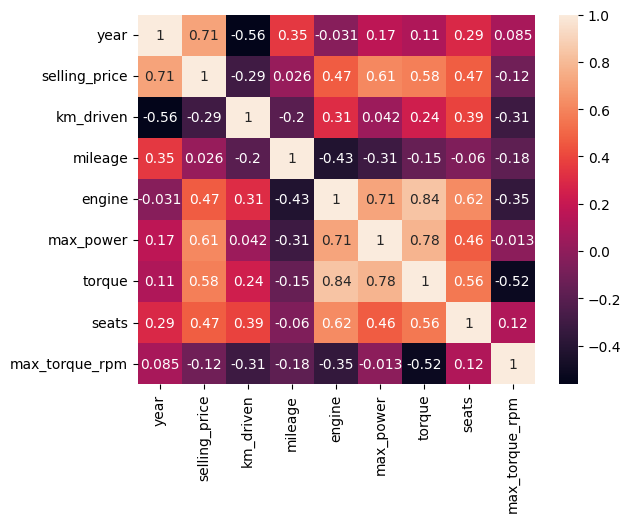

In [40]:
sns.heatmap(spearman_corr(df_train[numeric_features]), annot = True, xticklabels = numeric_features, yticklabels = numeric_features) # My Spearman

<Axes: >

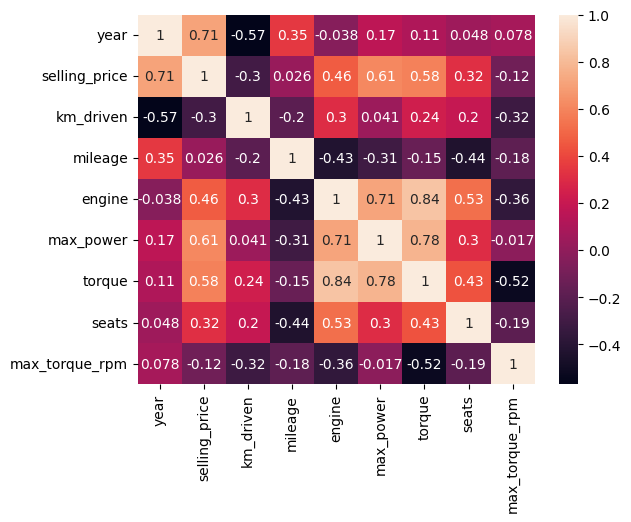

In [41]:
sns.heatmap(df_train[numeric_features].corr(method = 'spearman'), annot = True, xticklabels = numeric_features, yticklabels = numeric_features) # Pandas Spearman

Две реализации корреляции Спирмена очень похожи, но есть небольшие отличия. Подозреваю, что эти различия происходят из-за того, что одинаковым значениям в Пандасе ранги присваиваются немного по-другому. В моей реализации используется метод rank(), который одинаковым значениям ставит ровно середину между двумя рангами (Условно, если сейчас сравниваются претенденты на 10 и 11 ранг, но значения у них совпадают, то обоим будет присвоен ранг 10.5)

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


<Axes: >

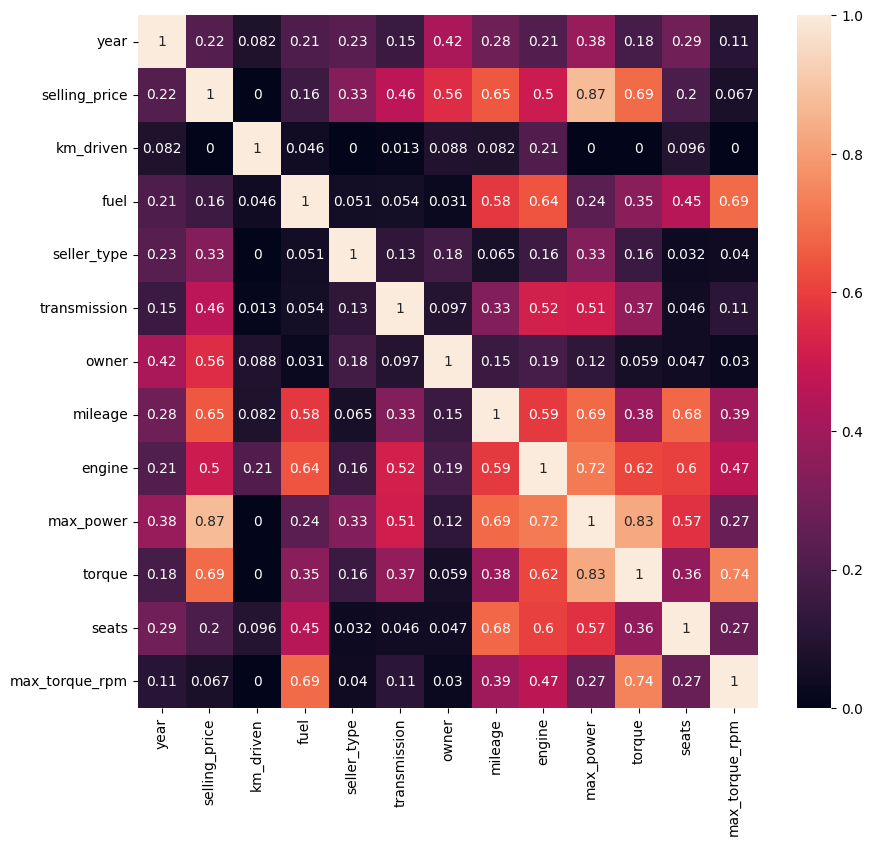

In [42]:
import phik
from phik import resources, report

plt.figure(figsize=(10, 9))
sns.heatmap(df_train.drop(columns = 'name').phik_matrix(), annot = True)

Phi_k корреляция показывает насколько хи-квадрат распределение, полученное из распределений по выборке с помощью двух наших переменных, отличается от распределения, которое было бы получено при условии независимости этих переменных. То есть phi_k корреляция по сути смотрит на значение ковариации полученное из матрицы дисперсий, которая получается при моделировании двумерного стандартного нормального распределения по нашему значению хи-квадрат для этих двух переменных.

Мы нашли, что по Phi_k корреляции больше всего друг с другом коррелируют следующие пары переменных: (selling_price, max_power), (max_power, torque), (torque, max_torque_rpm), (engine, max_power), (selling_price, torque), (fuel, max_torque_rpm), (mileage, max_power), (mileage, seats), (selling_price, mileage)

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

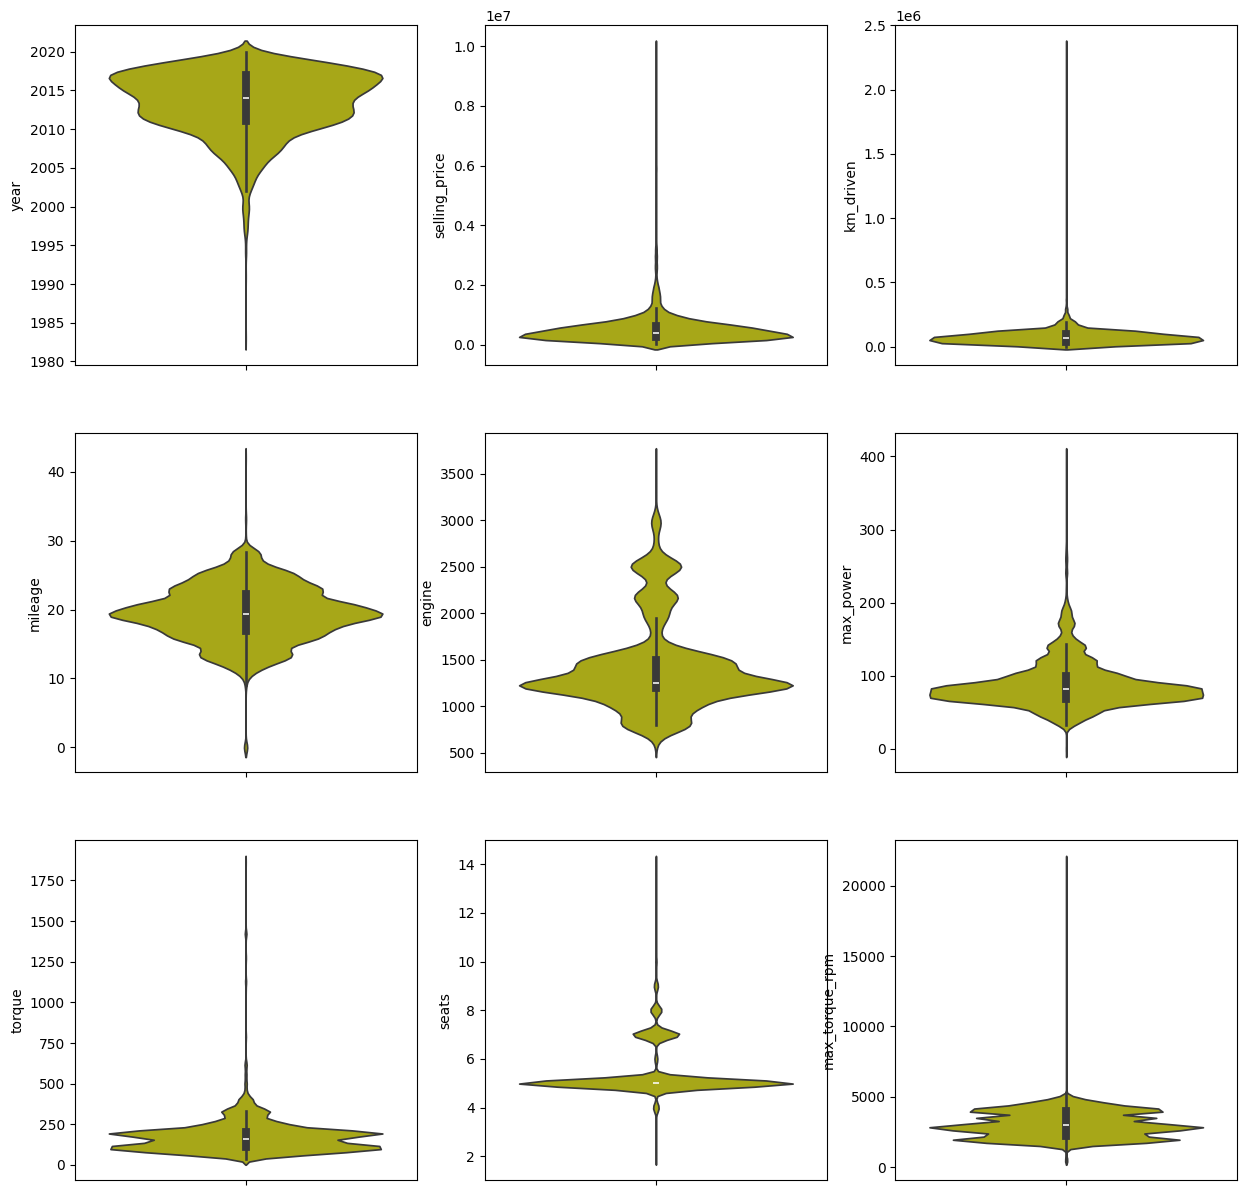

In [43]:
# Хочется посмотреть на квантили
fig, axis = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 15))
for i, feature in enumerate(numeric_features):
  sns.violinplot(df_train[feature], ax = axis[i // 3][i % 3], color = 'y')

Теперь можно увидеть на графике процентилей, что почти по каждой переменной есть также много выбросов. Так как до этого строить box плоты и как либо обрабатывать выбросы нас не просили, оставим их.

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [44]:
numeric_features = ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']
df_train_numeric = df_train[numeric_features].copy()

y_train = df_train_numeric['selling_price']
X_train = df_train_numeric.drop(columns = ['selling_price'])

In [45]:
X_train.shape

(5840, 8)

Мы разбили torque на два признака + seats считаем вещественным => осталось 8.

In [46]:
# assert X_train.shape == (5840, 6)

In [47]:
df_test_numeric = df_test[numeric_features].copy()

y_test = df_test_numeric['selling_price']
X_test = df_test_numeric.drop(columns = ['selling_price'])

In [48]:
X_test.shape

(1000, 8)

In [49]:
# assert X_test.shape == (1000, 6)

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test_1 = model.predict(X_test)

print(f'Train MSE: {MSE(y_train, y_pred_train)}, Train R2 score: {r2_score(y_train, y_pred_train)}')
print(f'Test MSE: {MSE(y_test, y_pred_test_1)}, Test R2 score: {r2_score(y_test, y_pred_test_1)}')

Train MSE: 114291592701.89175, Train R2 score: 0.601268995080514
Test MSE: 229534253397.13724, Test R2 score: 0.6006909344609705


### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [51]:
def r2(y_true, y_pred):
  mse = np.sum((y_true - y_pred) ** 2)
  dispersion = np.sum((y_true - np.mean(y_true)) ** 2)
  return 1 - mse/dispersion
print(f'My R2 score: {r2(y_test, y_pred_test_1)}; Sklearn R2 score: {r2_score(y_test, y_pred_test_1)}')

My R2 score: 0.6006909344609705; Sklearn R2 score: 0.6006909344609705


R2 score считается как 1 - MSE/D[y], то есть иными словами R squared показывает, какая доля дисперсии объясняется нашей моделью.

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [52]:
def adjusted_r2(y_true, y_pred, n_params):
  n = y_true.shape[0]
  return 1 - (1 - r2(y_true, y_pred)) * (n - 1) / (n - n_params - 1)
print(f'My Adjusted R2 score: {adjusted_r2(y_test, y_pred_test_1, 8)}')

My Adjusted R2 score: 0.5974674505817453


Adjusted r2 score применяется для того, чтобы можно было сравнивать модели с разным количеством параметров, так как при добавлении дополнительных предикторов MSE всегда падает => r2 score всегда растёт. Чтобы понять информативность нового предиктора или вцелом понять насколько хорошо себя ведёт модель с большим количеством предикторов стоит применить adjusted r2, чтобы учесть уменьшение степеней степеней свободы в модели.

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [54]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test_2 = model.predict(X_test)

print(f'Train MSE: {MSE(y_train, y_pred_train)}, Train R2 score: {r2_score(y_train, y_pred_train)}')
print(f'Test MSE: {MSE(y_test, y_pred_test_2)}, Test R2 score: {r2_score(y_test, y_pred_test_2)}')
print(dict(zip(df_train_numeric.columns, model.coef_)))

Train MSE: 114291592701.8919, Train R2 score: 0.6012689950805135
Test MSE: 229534253397.13452, Test R2 score: 0.6006909344609752
{'year': 165828.51327369196, 'selling_price': -48770.103159359074, 'km_driven': -8866.396177653885, 'mileage': 22171.18807264067, 'engine': 329191.5281644323, 'max_power': 8004.582778832202, 'torque': -30101.826491658285, 'seats': -59163.11931097068}


Признак engine оказался самым информативным - его коэффициент 329.2

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [55]:
from sklearn.linear_model import Lasso

model = Lasso(max_iter = 5000)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test_3 = model.predict(X_test)

print(f'Train MSE: {MSE(y_train, y_pred_train)}, Train R2 score: {r2_score(y_train, y_pred_train)}')
print(f'Test MSE: {MSE(y_test, y_pred_test_3)}, Test R2 score: {r2_score(y_test, y_pred_test_3)}')
print(dict(zip(df_train_numeric.columns, model.coef_)))

Train MSE: 114291592715.49722, Train R2 score: 0.6012689950330484
Test MSE: 229534993022.7418, Test R2 score: 0.6006896477719268
{'year': 165826.3116857964, 'selling_price': -48769.167501260534, 'km_driven': -8863.105589626546, 'mileage': 22169.17508331954, 'engine': 329192.92338352103, 'max_power': 8003.93733322693, 'torque': -30097.853165794026, 'seats': -59161.04396750892}


Качество модели на тесте и коэффициенты при переменных почти не изменили, потому что alpha по умолчанию в модели слишком маленькая. Надо подобрать этот гиперпараметр, но это уже в следующем задании.

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [56]:
from sklearn.model_selection import GridSearchCV

model = Lasso()
param_grid = {'alpha': [1, 5, 10, 50, 100, 200, 500, 1000, 5000]}
grid = GridSearchCV(model, param_grid, cv = 10, scoring = 'r2', verbose = 3)
grid.fit(X_train, y_train)

model = grid.best_estimator_
params = grid.best_params_

y_pred_train = model.predict(X_train)
y_pred_test_4 = model.predict(X_test)

print(f'Train MSE: {MSE(y_train, y_pred_train)}, Train R2 score: {r2_score(y_train, y_pred_train)}')
print(f'Test MSE: {MSE(y_test, y_pred_test_4)}, Test R2 score: {r2_score(y_test, y_pred_test_4)}')
print(dict(zip(df_train_numeric.columns, model.coef_)))
print(params)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10] END ..........................alpha=1;, score=0.571 total time=   0.0s
[CV 2/10] END ..........................alpha=1;, score=0.599 total time=   0.0s
[CV 3/10] END ..........................alpha=1;, score=0.660 total time=   0.0s
[CV 4/10] END ..........................alpha=1;, score=0.593 total time=   0.0s
[CV 5/10] END ..........................alpha=1;, score=0.410 total time=   0.0s
[CV 6/10] END ..........................alpha=1;, score=0.669 total time=   0.0s
[CV 7/10] END ..........................alpha=1;, score=0.472 total time=   0.0s
[CV 8/10] END ..........................alpha=1;, score=0.638 total time=   0.0s
[CV 9/10] END ..........................alpha=1;, score=0.558 total time=   0.0s
[CV 10/10] END .........................alpha=1;, score=0.581 total time=   0.0s
[CV 1/10] END ..........................alpha=5;, score=0.571 total time=   0.0s
[CV 2/10] END ..........................alpha=5;

Гридсёрч обучал 130 моделей: 10 фолдов x 13 вариантов гиперпараметра alpha.
В param_grid лежат переменные, которые мы будем подставлять в качестве гиперпараметров модели, чтобы найти лучшие гиперпараметры для модели.

Alpha в Lasso - это коэффициент перед l1 нормой весов.

Alpha в ElasticNet - сумма коэффициентов перед l1 нормой весов и l2 нормой весов; l1_ratio - доля, с которой alpha пойдёт в коеффициент перед нормой l1.

Вес перед km_driven занулился. Оптимальный параметр alpha равен 5000.

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [57]:
from sklearn.linear_model import ElasticNet

model = ElasticNet()

param_grid = {'alpha': [0.1, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100],
              'l1_ratio': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
grid = GridSearchCV(model, param_grid, cv = 10, scoring = 'r2', verbose = 3)
grid.fit(X_train, y_train)

model = grid.best_estimator_
params = grid.best_params_

y_pred_train = model.predict(X_train)
y_pred_test_5 = model.predict(X_test)

print(f'Train MSE: {MSE(y_train, y_pred_train)}, Train R2 score: {r2_score(y_train, y_pred_train)}')
print(f'Test MSE: {MSE(y_test, y_pred_test_5)}, Test R2 score: {r2_score(y_test, y_pred_test_5)}')
print(dict(zip(df_train_numeric.columns, model.coef_)))
print(params)

Fitting 10 folds for each of 143 candidates, totalling 1430 fits
[CV 1/10] END .........alpha=0.1, l1_ratio=0.01;, score=0.540 total time=   0.0s
[CV 2/10] END .........alpha=0.1, l1_ratio=0.01;, score=0.616 total time=   0.0s
[CV 3/10] END .........alpha=0.1, l1_ratio=0.01;, score=0.662 total time=   0.0s
[CV 4/10] END .........alpha=0.1, l1_ratio=0.01;, score=0.593 total time=   0.0s
[CV 5/10] END .........alpha=0.1, l1_ratio=0.01;, score=0.458 total time=   0.0s
[CV 6/10] END .........alpha=0.1, l1_ratio=0.01;, score=0.656 total time=   0.0s
[CV 7/10] END .........alpha=0.1, l1_ratio=0.01;, score=0.470 total time=   0.0s
[CV 8/10] END .........alpha=0.1, l1_ratio=0.01;, score=0.648 total time=   0.0s
[CV 9/10] END .........alpha=0.1, l1_ratio=0.01;, score=0.589 total time=   0.0s
[CV 10/10] END ........alpha=0.1, l1_ratio=0.01;, score=0.580 total time=   0.0s
[CV 1/10] END ..........alpha=0.1, l1_ratio=0.1;, score=0.543 total time=   0.0s
[CV 2/10] END ..........alpha=0.1, l1_ratio=

Гридсёрч обучал 1430 моделей: 10 фолдов x 13 вариантов alpha x 11 вариантов l1_ratio. Получили, что оптимальными гиперпараметрами являются alpha = 1 и l1_ratio = 0.9

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [58]:
# your code here

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

Предлагаю сохранить только первое слово названия, которое как правило обозначает марку автомобиля. Тогда при OHE мы сохраним очень много информации:

In [59]:
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power  \
0  Individual       Manual   First Owner    23.40    1248      74.00   
1  Individual       Manual  Second Owner    21.14    1498     103.52   
2  Individual       Manual   First Owner    23.00    1396      90.00   
3  Individual       Manual   First Owner    16.10    1298      88.20   
4  Individual       Manual   First Owner    20.14    1197      81.86   

       torque  seats  max_torque_rpm  
0  190.000000      5          2000.0  
1  250.000000      5          2500.0  
2  215.745499      5          2750.0  
3  107.872749      5          4500.0  
4  113.000000      5          4000.0

In [60]:
df_train.head(15)['name']

0                   Maruti Swift Dzire VDI
1             Skoda Rapid 1.5 TDI Ambition
2                Hyundai i20 Sportz Diesel
3                   Maruti Swift VXI BSIII
4            Hyundai Xcent 1.2 VTVT E Plus
5             Maruti Wagon R LXI DUO BSIII
6                       Maruti 800 DX BSII
7                         Toyota Etios VXD
8     Ford Figo Diesel Celebration Edition
9          Renault Duster 110PS Diesel RxL
10                           Maruti Zen LX
11                  Maruti Swift Dzire VDi
12                    Maruti Swift 1.3 VXi
13                Maruti Wagon R LXI Minor
14    Mahindra KUV 100 mFALCON G80 K8 5str
Name: name, dtype: object

In [61]:
X_train = df_train.drop(columns = ['selling_price'])
X_test = df_test.drop(columns = ['selling_price'])

X_train['name'] = X_train['name'].apply(lambda x: x.split()[0])
X_test['name'] = X_test['name'].apply(lambda x: x.split()[0])

In [62]:
X_train.head(15)['name']

0       Maruti
1        Skoda
2      Hyundai
3       Maruti
4      Hyundai
5       Maruti
6       Maruti
7       Toyota
8         Ford
9      Renault
10      Maruti
11      Maruti
12      Maruti
13      Maruti
14    Mahindra
Name: name, dtype: object

Опять же, у нас на два солбца больше:

In [63]:
X_train.shape
# assert X_train_cat.shape == (5840, 11)

(5840, 13)

In [64]:
X_train.describe(include='object')

name    fuel seller_type transmission        owner
count     5840    5840        5840         5840         5840
unique      30       4           3            2            5
top     Maruti  Diesel  Individual       Manual  First Owner
freq      1804    3177        5223         5336         3603

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [65]:
# или можно использовать get_dummies из библиотеки pandas

X_train['seats'] = X_train['seats'].astype(str)
X_test['seats'] = X_test['seats'].astype(str)

X_train = pd.get_dummies(X_train, columns=['name', 'seats', 'fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['name', 'seats', 'fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

In [66]:
X_train.head()

engine  fuel_Diesel  fuel_LPG  fuel_Petrol  km_driven  max_power  \
0    1248         True     False        False     145500      74.00   
1    1498         True     False        False     120000     103.52   
2    1396         True     False        False     127000      90.00   
3    1298        False     False         True     120000      88.20   
4    1197        False     False         True      45000      81.86   

   max_torque_rpm  mileage  name_Ashok  name_Audi  ...  seats_5  seats_6  \
0          2000.0    23.40           0      False  ...     True    False   
1          2500.0    21.14           0      False  ...     True    False   
2          2750.0    23.00           0      False  ...     True    False   
3          4500.0    16.10           0      False  ...     True    False   
4          4000.0    20.14           0      False  ...     True    False   

   seats_7  seats_8  seats_9  seller_type_Individual  \
0    False    False    False                    True   
1    False    False    False                    True   
2    False    False    False                    True   
3    False    False    False                    True   
4    False    False    False                    True   

   seller_type_Trustmark Dealer      torque  transmission_Manual  year  
0                         False  190.000000                 True  2014  
1                         False  250.000000                 True  2014  
2                         False  215.745499                 True  2010  
3                         False  107.872749                 True  2007  
4                         False  113.000000                 True  2017  

[5 rows x 56 columns]

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

Как корректно работать с OHE преобразованием?

При работе с OHE для задачи регрессии мы должны сделать fit нашей OHE трансформации на обучающей выборке и применить её, выбрасывая одну категорию из каждого столбца. Далее мы делаем transform обучающей и тестовой выборки.

Почему мы удаляем один столбец?

Потому что иначе наши столбцы, пораждаемые категорией, в которой не удалён один категориальный столбец, + интерсепт будут мультиколлинеарны. То есть при подсчёте матрица X^T*X, как и матрица X, будет иметь неполный ранг, что приведёт к тому, что она необратима и решений будет бесконечное множество и оно не сойдётся.

Пусть из  n  признаков мы получили  n−1  столбец, из которых  k<n−1  оказались не важными по весам модели. Корректно ли их удалить?

Нет, некорректно, так как это один и тот же категориальный признак, поэтому оценивать важность весов надо также совместно.

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [67]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

model = Ridge(max_iter = 5000)
param_grid = {'alpha': [0.1, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100]}
grid = GridSearchCV(model, param_grid, cv = 10, scoring = 'r2', verbose = 3)
grid.fit(X_train, y_train)

model = grid.best_estimator_
params = grid.best_params_

y_pred_train = model.predict(X_train)
y_pred_test_6 = model.predict(X_test)

print(f'Train MSE: {MSE(y_train, y_pred_train)}, Train R2 score: {r2_score(y_train, y_pred_train)}')
print(f'Test MSE: {MSE(y_test, y_pred_test_6)}, Test R2 score: {r2_score(y_test, y_pred_test_6)}')
print(dict(zip(df_train_numeric.columns, model.coef_)))
print(params)

Fitting 10 folds for each of 13 candidates, totalling 130 fits
[CV 1/10] END ........................alpha=0.1;, score=0.718 total time=   0.0s
[CV 2/10] END ........................alpha=0.1;, score=0.801 total time=   0.0s
[CV 3/10] END ........................alpha=0.1;, score=0.753 total time=   0.0s
[CV 4/10] END ........................alpha=0.1;, score=0.657 total time=   0.0s
[CV 5/10] END ........................alpha=0.1;, score=0.552 total time=   0.0s
[CV 6/10] END ........................alpha=0.1;, score=0.814 total time=   0.0s
[CV 7/10] END ........................alpha=0.1;, score=0.681 total time=   0.0s
[CV 8/10] END ........................alpha=0.1;, score=0.651 total time=   0.0s
[CV 9/10] END ........................alpha=0.1;, score=0.725 total time=   0.0s
[CV 10/10] END .......................alpha=0.1;, score=0.732 total time=   0.0s
[CV 1/10] END ........................alpha=0.5;, score=0.714 total time=   0.0s
[CV 2/10] END ........................alpha=0.

Модель стала гораздо лучше. Её качество по метрике r2 на тестовой выборке выросло с 0.6 в модели без категориальных фичей до 0.775 в модели с категориальными фичами.

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

№1 Превратим нашу линейную регрессию в полиномиальную регрессию второй степени: добавим квадраты числовых признаков и interaction переменные между каждой парой числовых признаков

№2 Я немного опередил это задание и уже использовал марку автомобиля в предыдущей части. Теперь можем добавить ещё информации из name, оставив кроме марки машины ещё и модель.

№3 Давайте уберём выбросы из данных.

Попробуем применить всё вышеперечисленное в коде:

In [68]:
X_train = df_train.drop(columns = ['selling_price'])
X_test = df_test.drop(columns = ['selling_price'])

y_train = df_train['selling_price']
y_test = df_test['selling_price']

# 1
numeric_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']
for col_1 in numeric_features:
  for col_2 in numeric_features:
    if col_1 == col_2:
      new_name = col_1 + '_squared'
    else:
      new_name = col_1 + '_x_' + col_2
    X_train[new_name] = X_train[col_1] * X_train[col_2]
    X_test[new_name] = X_test[col_1] * X_test[col_2]

# 2
X_train['name'] = X_train['name'].apply(lambda x: x.split()[0] + ' ' + x.split()[1])
X_test['name'] = X_test['name'].apply(lambda x: x.split()[0] + ' ' + x.split()[1])

X_train['seats'] = X_train['seats'].astype(str)
X_test['seats'] = X_test['seats'].astype(str)

X_train = pd.get_dummies(X_train, columns=['name', 'seats', 'fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['name', 'seats', 'fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

# 3
for feature in numeric_features:
    q1 = X_train[feature].quantile(0.1)
    q3 = X_train[feature].quantile(0.9)
    iqr = q3 - q1
    l_bound = q1 - 2 * iqr
    u_bound = q3 + 2 * iqr
    y_train = y_train[(X_train[feature] >= l_bound) & (X_train[feature] <= u_bound)]
    X_train = X_train[(X_train[feature] >= l_bound) & (X_train[feature] <= u_bound)]

In [69]:
model = Ridge(max_iter = 5000)
param_grid = {'alpha': [0.01, 0.05, 0.1, 1, 5]}
grid = GridSearchCV(model, param_grid, cv = 10, scoring = 'r2', verbose = 3)
grid.fit(X_train, y_train)

model = grid.best_estimator_
params = grid.best_params_

y_pred_train = model.predict(X_train)
y_pred_test_7 = model.predict(X_test)

print(f'Train MSE: {MSE(y_train, y_pred_train)}, Train R2 score: {r2_score(y_train, y_pred_train)}')
print(f'Test MSE: {MSE(y_test, y_pred_test_7)}, Test R2 score: {r2_score(y_test, y_pred_test_7)}')
print(params)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV 1/10] END .......................alpha=0.01;, score=0.825 total time=   0.3s
[CV 2/10] END .......................alpha=0.01;, score=0.850 total time=   0.3s
[CV 3/10] END .......................alpha=0.01;, score=0.891 total time=   0.3s
[CV 4/10] END .......................alpha=0.01;, score=0.899 total time=   0.3s
[CV 5/10] END .......................alpha=0.01;, score=0.883 total time=   0.3s
[CV 6/10] END .......................alpha=0.01;, score=0.930 total time=   0.3s
[CV 7/10] END .......................alpha=0.01;, score=0.798 total time=   0.3s
[CV 8/10] END .......................alpha=0.01;, score=0.800 total time=   0.3s
[CV 9/10] END .......................alpha=0.01;, score=0.878 total time=   0.3s
[CV 10/10] END ......................alpha=0.01;, score=0.835 total time=   0.3s
[CV 1/10] END .......................alpha=0.05;, score=0.842 total time=   0.3s
[CV 2/10] END .......................alpha=0.05;

In [70]:
X_train.columns

Index(['engine', 'engine_squared', 'engine_x_km_driven', 'engine_x_max_power',
       'engine_x_max_torque_rpm', 'engine_x_mileage', 'engine_x_torque',
       'engine_x_year', 'fuel_Diesel', 'fuel_LPG',
       ...
       'torque_x_year', 'transmission_Manual', 'year', 'year_squared',
       'year_x_engine', 'year_x_km_driven', 'year_x_max_power',
       'year_x_max_torque_rpm', 'year_x_mileage', 'year_x_torque'],
      dtype='object', length=283)

Сделав преобразования выше мы достигли гораздо лучшего результата, чем было до этого (R2: 0.934 vs 0.775)

Завернём нашу модель в pickle формат для последующей распаковки в предпоследней части:

In [71]:
import pickle
with open('best_model.pickle', 'wb') as output:
  pickle.dump(model, output)
with open('columns.pickle', 'wb') as output:
  pickle.dump(X_train.columns, output)

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [72]:
def business_metrics(y_true, y_pred):
    return np.sum(np.abs((y_pred - y_true)/y_true) < 0.1) / y_true.shape[0]

y_preds = [y_pred_test_1, y_pred_test_2, y_pred_test_3, y_pred_test_4, y_pred_test_5, y_pred_test_6, y_pred_test_7]
for i, y_pred in enumerate(y_preds):
  print(f'Business metric for model {i + 1}: {business_metrics(y_test, y_pred)}')

Business metric for model 1: 0.242
Business metric for model 2: 0.242
Business metric for model 3: 0.242
Business metric for model 4: 0.242
Business metric for model 5: 0.254
Business metric for model 6: 0.294
Business metric for model 7: 0.397


Ожидаемо в последней модели самый большой показатель нашей бизнес метрики, а также он ожидаемо растёт по ходу улучшения модели.

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



Простой метрикой, которая наказывает за недопрогноз больше чем за перепрогноз, можно просто сделать долю автомобилей, которую мы недопрогнозируем больше чем на 10%. То есть какая доля машин нами обесценена больше чем на 10%. Сделаем её:

In [73]:
def your_business_metrics(y_true, y_pred):
    return np.sum((y_true - y_pred) / y_true > 0.1) / y_true.shape[0]
y_preds = [y_pred_test_1, y_pred_test_2, y_pred_test_3, y_pred_test_4, y_pred_test_5, y_pred_test_6, y_pred_test_7]
for i, y_pred in enumerate(y_preds):
  print(f'Business metric for model {i + 1}: {your_business_metrics(y_test, y_pred)}')

Business metric for model 1: 0.358
Business metric for model 2: 0.358
Business metric for model 3: 0.358
Business metric for model 4: 0.35
Business metric for model 5: 0.346
Business metric for model 6: 0.348
Business metric for model 7: 0.296


Опять же видим, что самая последняя модель справляется с бизнес задачей лучше всего (это метрика ошибок, поэтому меньше -> лучше)

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [74]:
!pip install fastapi
!pip install pydantic
!pip install uvicorn
!npm install -g localtunnel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 1.5 MB/s eta 0:00:00

added 22 packages, and audited 23 packages in 2s

3 packages are looking for funding
  run `npm fund` for details

1 moderate severity vulnerability

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.


In [75]:
%%writefile main.py
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List
import uvicorn
import pandas as pd
import re
import pickle
import numpy as np

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]

with open('best_model.pickle', 'rb') as best_model: # Загружаем модель
    model = pickle.load(best_model)

with open('columns.pickle', 'rb') as model_cols: # Загружаем названия колонок
    columns = pickle.load(model_cols)

def trunc_max_power(value): # Вспоминаем, как предобрабатывать строки в признаки
  if not value is np.nan and value != '0' and value != ' bhp':
    return float(value[:-4])
  elif value == '0':
    return 0.
  else:
    return np.nan

def trunc_mileage(value):
  if not value is np.nan and value[-2:] == 'pl':
    return float(value[:-5])
  elif not value is np.nan and value[-2:] == 'kg':
    return float(value[:-6])
  elif value == '0':
    return 0.
  else:
    return np.nan

def trunc_engine(value):
  if not value is np.nan:
    return float(value[:-3])
  else:
    return np.nan

def find_force(value):
  if value is np.nan:
    return np.nan
  value = value.lower()
  value = value.replace(',', '')
  if 'nm' in value:
    return float(re.findall('\d+', value)[0])
  elif 'kgm' in value:
    return float(re.findall('\d+', value)[0]) / 0.101972 # Converting to nm
  elif len(str(int(re.findall('\d+', value)[0]))) == 3:
    return float(re.findall('\d+', value)[0])
  elif len(str(int(re.findall('\d+', value)[0]))) == 2:
    return float(re.findall('\d+', value)[0]) / 0.101972
  else:
    print(value)
    raise ValueError # Check that all values were found correctly

def find_max_rpm(value):
  if value is np.nan:
    return np.nan
  value = value.lower()
  value = value.replace(',', '')
  if 'rpm' in value:
    return float(re.findall('\d+', value)[-1])
  elif len(re.findall('\d+', value)) > 1:
    return float(re.findall('\d+', value)[-1])
  else:
    return np.nan

@app.post("/predict_item")
def predict_item(item: Item) -> float:
    item_dict = dict(item.copy())

    # Делаем предобработку признаков как раньше
    item_dict['name'] = item_dict['name'].split()[0] + ' ' + item_dict['name'].split()[1]
    item_dict.pop('selling_price')
    item_dict['mileage'] = trunc_mileage(item_dict['mileage'])
    item_dict['max_power'] = trunc_max_power(item_dict['max_power'])
    item_dict['engine'] = trunc_engine(item_dict['engine'])
    item_dict['max_torque_rpm'] = find_max_rpm(item_dict['torque'])
    item_dict['torque'] = find_force(item_dict['torque'])
    item_dict['seats'] = str(item_dict['seats'])

    numeric_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']
    categorial_features = ['name', 'seats', 'fuel', 'seller_type', 'transmission', 'owner']
    for feature in categorial_features:
      item_dict[feature+'_'+item_dict[feature]] = 1.
      item_dict.pop(feature)

    for col_1 in numeric_features:
      for col_2 in numeric_features:
        if col_1 == col_2:
          new_name = col_1 + '_squared'
        else:
          new_name = col_1 + '_x_' + col_2
        item_dict[new_name] = item_dict[col_1] * item_dict[col_2]

    user_df = pd.DataFrame(item_dict, columns = columns, index = [0])
    user_df.fillna(0., inplace = True)

    return model.predict(user_df)


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    preds = []
    for item in items:
      preds.append(predict_item(item))
    return preds

Writing main.py


In [76]:
!uvicorn main:app & npx localtunnel --port 8000 --subdomain fastapi & wget -q -O - https://loca.lt/mytunnelpassword

34.106.237.234your url is: https://fastapi.loca.lt
INFO:     Started server process [1565]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     2.59.163.68:0 - "GET / HTTP/1.1" 404 Not Found
INFO:     2.59.163.68:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     2.59.163.68:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     2.59.163.68:0 - "GET /openapi.json HTTP/1.1" 200 OK
/content/main.py:120: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  user_df.fillna(0., inplace = True)
INFO:     2.59.163.68:0 - "POST /predict_item HTTP/1.1" 200 OK
/content/main.py:120: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future v

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>